In [1]:
import numpy as np
import pandas as pd

In [2]:
df  = pd.read_csv("/Users/prince/Downloads/Grocery App.csv",usecols = ["content"])

In [3]:
df.head()

,content
0,horrible experience
1,8 min show krke 30 min a kaaat te h
2,This blinkit app take delivery surge charge An...
3,I lost my 💰
4,It was superb until Zomato took over. As Zomat...


In [4]:
a=df.to_string(header=False,index=False)

In [5]:
import re
cleaned_review = re.sub(re.compile('<.*?>'), '', a) #removing HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) #taking only words


In [6]:
cleaned_review = cleaned_review.lower()

In [7]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(cleaned_review)

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
text = " ".join(cat for cat in filtered_review)

In [10]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)

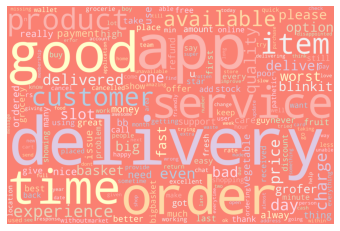

In [11]:
    import matplotlib.pyplot as plt
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf = TfidfVectorizer()

In [14]:
result = tfidf.fit_transform(filtered_review)

In [15]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
00 : 10.21000644526112
000 : 12.632392738067788
0000 : 13.931675722198047
0009 : 13.931675722198047
009u3 : 13.931675722198047
00am : 13.238528541638102
00hrs : 14.337140830306213
00p : 13.931675722198047
00pm : 12.3912306812509
01 : 11.503927486249996
010716 : 14.337140830306213
010916 : 14.337140830306213
01hr : 14.337140830306213
01kgs : 14.337140830306213
02 : 11.392701851139773
02kg : 14.337140830306213
02oct : 14.337140830306213
02pm : 14.337140830306213
03 : 11.564552108066431
03month : 13.931675722198047
03pm : 14.337140830306213
04 : 11.159086999958266
040616 : 13.931675722198047
040916 : 14.337140830306213
04i : 13.931675722198047
05 : 11.059996097314036
05am : 13.931675722198047
05bc00fb2185 : 13.931675722198047
05gm : 13.931675722198047
05pm : 14.337140830306213
06 : 11.269087895172595
0604 : 14.337140830306213
060916 : 14.337140830306213
06th : 13.931675722198047
07 : 11.392701851139773
070 : 13.931675722198047
0700 : 13.931675722198047
070616 : 13.93167572219

/Users/prince/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 13.931675722198047
2315 : 14.337140830306213
232 : 14.337140830306213
233 : 14.337140830306213
2330 : 14.337140830306213
234 : 14.337140830306213
2346 : 14.337140830306213
235 : 12.950846469186322
235824 : 14.337140830306213
237 : 14.337140830306213
238 : 13.643993649746267
239 : 13.931675722198047
23jul22 : 14.337140830306213
23minutes : 13.931675722198047
23rd : 12.139916252969993
24 : 9.306702908913776
240 : 13.084377861810845
2400 : 13.643993649746267
240221 : 14.337140830306213
241 : 14.337140830306213
241016 : 14.337140830306213
242rs : 14.337140830306213
243when : 14.337140830306213
244 : 13.931675722198047
244001 : 14.337140830306213
244222 : 13.931675722198047
244rs : 14.337140830306213
245 : 13.084377861810845
245101 : 13.931675722198047
245ka : 14.337140830306213
247 : 13.420850098432057
249 : 14.337140830306213
24hour : 13.931675722198047
24hours : 12.833063433529938
24hr : 12.727702917872111
24hrs : 11.662992180879684
24mantra : 14.337140830306213
24mins : 13.931675722198

In [16]:

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
 



Word indexes:
{'horrible': 11869, 'experience': 9371, 'min': 15471, 'show': 21720, 'krke': 13890, '30': 836, 'kaaat': 13387, 'te': 23388, 'blinkit': 4372, 'app': 2736, 'take': 23262, 'delivery': 7396, 'surge': 23063, 'charge': 5373, 'rain': 19380, 'also': 2417, 'doesnt': 8241, 'provide': 19037, 'time': 23874, 'customer': 6869, 'kind': 13721, 'like': 14320, 'owe': 17537, 'us': 24979, 'support': 23014, 'ordered': 17300, 'understanding': 24615, 'problem': 18835, 'saying': 21096, 'company': 6030, 'fault': 9672, 'whether': 25855, 'lost': 14584, 'superb': 22954, 'zomato': 26483, 'took': 24056, 'using': 25012, 'fooling': 10059, 'tricks': 24262, 'charges': 5381, 'increased': 12410, 'fake': 9568, 'showing': 21727, 'high': 11679, 'demand': 7451, 'surcharge': 23051, 'fees': 9733, 'boycotting': 4585, 'use': 24987, 'apps': 2834, '22': 601, 'present': 18705, 'getting': 10640, 'worse': 26113, 'excessive': 9214, 'late': 14085, 'still': 22606, '45rs': 1123, 'extra': 9467, 'shifting': 21598, 'swiggy': 

In [17]:
# display tf-idf values
print('\ntf-idf value:')
print(result)
 



tf-idf value:
  (0, 11869)	1.0
  (1, 9371)	1.0
  (3, 15471)	1.0
  (4, 21720)	1.0
  (5, 13890)	1.0
  (6, 836)	1.0
  (7, 15471)	1.0
  (8, 13387)	1.0
  (9, 23388)	1.0
  (11, 4372)	1.0
  (12, 2736)	1.0
  (13, 23262)	1.0
  (14, 7396)	1.0
  (15, 23063)	1.0
  (16, 5373)	1.0
  (17, 19380)	1.0
  (18, 23063)	1.0
  (19, 5373)	1.0
  (20, 2417)	1.0
  (21, 8241)	1.0
  (22, 19037)	1.0
  (23, 23874)	1.0
  (24, 7396)	1.0
  (25, 6869)	1.0
  (26, 13721)	1.0
  :	:
  (1239560, 21437)	1.0
  (1239561, 9131)	1.0
  (1239562, 17291)	1.0
  (1239563, 17267)	1.0
  (1239564, 14346)	1.0
  (1239565, 4853)	1.0
  (1239566, 22742)	1.0
  (1239567, 6038)	1.0
  (1239568, 3994)	1.0
  (1239569, 17793)	1.0
  (1239570, 9649)	1.0
  (1239571, 7396)	1.0
  (1239572, 10852)	1.0
  (1239573, 19244)	1.0
  (1239574, 10338)	1.0
  (1239575, 25266)	1.0
  (1239576, 8607)	1.0
  (1239577, 14459)	1.0
  (1239578, 2948)	1.0
  (1239579, 8607)	1.0
  (1239580, 17901)	1.0
  (1239581, 7396)	1.0
  (1239582, 23874)	1.0
  (1239583, 16456)	1.0
  (12395

In [18]:
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = [stemmer.stem(word) for word in filtered_review]

In [20]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

[nltk_data] Downloading package wordnet to /Users/prince/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/prince/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Topic Modelling

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

In [41]:
tf = vectorizer.fit_transform(lemm_review).toarray()

In [43]:
tf_feature_names_out = vectorizer.get_feature_names()
result = tfidf.fit_transform(lemm_review)

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)


In [ ]:
model.fit(tf)

In [30]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [31]:
no_top_words = 10
display_topics(model, _feature_names, no_top_words)

NameError: name 'tf_feature_names' is not defined